### Clustering Assignment Solution
Word Embedding used = TF-IDF

Clustering method = K-means

Clusters best visualized in PCA


In [1]:
#importing dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
data = pd.read_csv("clustering_assignment.csv")
print(len(data))
data[10:20]

327


,intents
10,Need a loan at lowest interest rate
11,Suggest me a loan with easy pay option
12,I want to get a mortgage on my house
13,I need credit of 50K. How do I apply for it?
14,I need to borrow 40K for expenses. Can I get l...
15,Could you grant me an allowance of 1200 USD
16,do you offer loans for veterans
17,I need some aid to set up my business
18,Can you faciltate finances for my wedding/admi...
19,Need some financial assistance


In [3]:
#deleting duplicates
data[data['intents'].duplicated(keep=False)].sort_values('intents').head()

,intents
48,500 is due for groceries payment
230,500 is due for groceries payment
29,Can 3000 be remitted to my landlord's account?
171,Can 3000 be remitted to my landlord's account?
282,Can I have my bank statement


In [4]:
#There are 49 instances which were repeated
data = data.drop_duplicates('intents')
#after removing duplicates
print(len(data))

278


Using TF-IDF to convert words into vectors and to reflect how important a word is in a corpus

Performing vectorization with stop words, stemming and tokenization in the following steps

In [5]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['intents'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)
desc[10:20]

array(['Need a loan at lowest interest rate',
       'Suggest me a loan with easy pay option',
       'I want to get a mortgage on my house',
       'I need credit of 50K. How do I apply for it?',
       'I need to borrow 40K for expenses. Can I get loan?',
       'Could you grant me an allowance of 1200 USD',
       'do you offer loans for veterans',
       'I need some aid to set up my business',
       'Can you faciltate finances for my wedding/admission/college fees',
       'Need some financial assistance'], dtype=object)

In [6]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[10:50])

418
['239482', '244', '30', '3000', '32231', '345231', '400', '40k', '50', '500', '5000', '50000', '500usd', '50k', '5yrs', '600', 'ac', 'acc', 'acccount', 'access', 'accont', 'accordingly', 'accoumt', 'account', 'accounts', 'accunt', 'acoount', 'additional', 'address', 'admission', 'advance', 'agent', 'aid', 'air', 'allowance', 'alternate', 'amazon', 'amunt', 'annual', 'anti']


In [7]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]


In [8]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[10:50]) 

363
['addit', 'address', 'admiss', 'advanc', 'agent', 'aid', 'air', 'allow', 'altern', 'amazon', 'amunt', 'annual', 'anoth', 'anti', 'app', 'appli', 'approv', 'arrang', 'asap', 'assist', 'atm', 'avail', 'b', 'bag', 'bal', 'balanc', 'bank', 'bean', 'behalf', 'belounc', 'bike', 'bitcoin', 'bluetooth', 'bnb', 'bob', 'book', 'borrow', 'bounc', 'broke', 'brother']


/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  sorted(inconsistent))


In [9]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()
words[10:15]

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  sorted(inconsistent))


['addit', 'address', 'admiss', 'advanc', 'agent']

Using k-means clustering algorithm with an Elbow method to select number of clusters

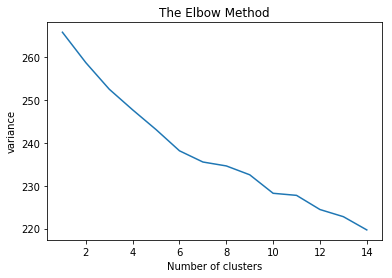

In [10]:
from sklearn.cluster import KMeans
variance = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    variance.append(kmeans.inertia_)
plt.plot(range(1,15),variance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('variance')
plt.savefig('tf-idf_elbow.png')
plt.show()

As more than one elbows have been generated, I have selected right amount of clusters by trial and error, which is a combination of the words grouped in different clusters (scroll down) and vizualization of the scatter plots using different methods

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(X3)
y_kmeans = km.predict(X3)

### Plot using Locally Linear Embedding technique

In [12]:
from sklearn import manifold
X3 = X3.toarray()
lle_data = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X3)

In [13]:
type(lle_data)

numpy.ndarray

In [14]:
lle_data.shape

(278, 2)

<IPython.core.display.Javascript object>


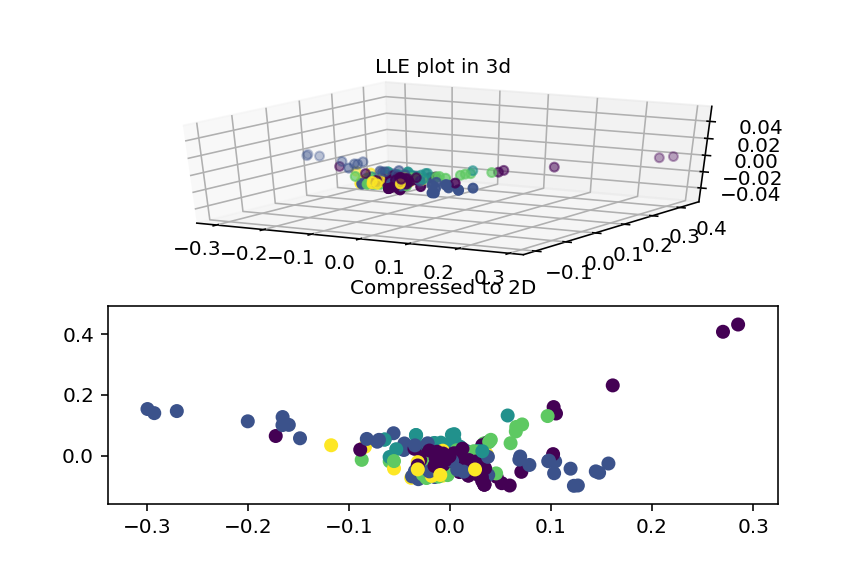

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('LLE plot in 3d', fontsize=10)
ax.scatter(lle_data[:,0],lle_data[:,1],c = y_kmeans)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('Compressed to 2D', fontsize=10)
ax.scatter(lle_data[:,0],lle_data[:,1],c = y_kmeans)
plt.show()

### Plot using T-SNE 

In [29]:
tsne_data = manifold.TSNE(n_components=2).fit_transform(X3)

In [30]:
tsne_data.shape

(278, 2)

<IPython.core.display.Javascript object>


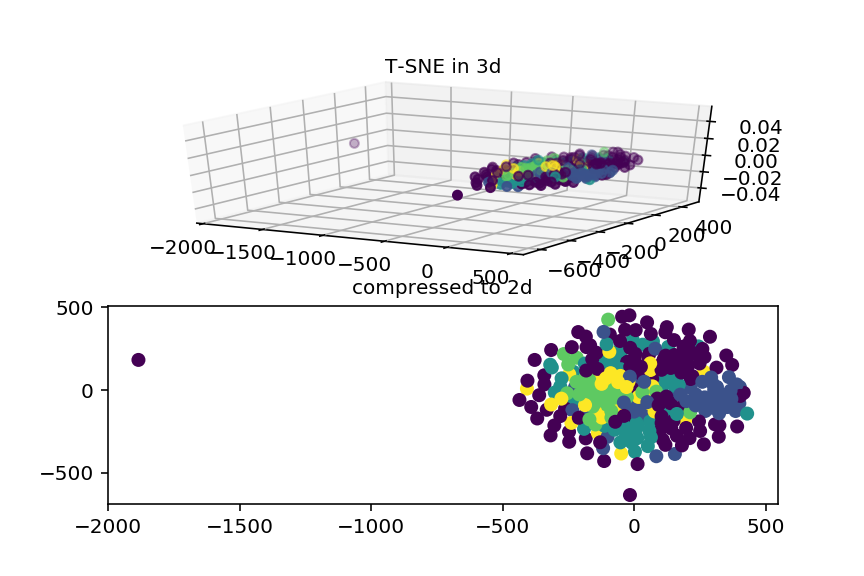

In [31]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('T-SNE in 3d', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = y_kmeans)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('compressed to 2d', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = y_kmeans)


### Plot using ISOmap

In [32]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X3)
manifold_data = iso.transform(X3)

In [20]:
manifold_data.shape

(278, 2)

<IPython.core.display.Javascript object>


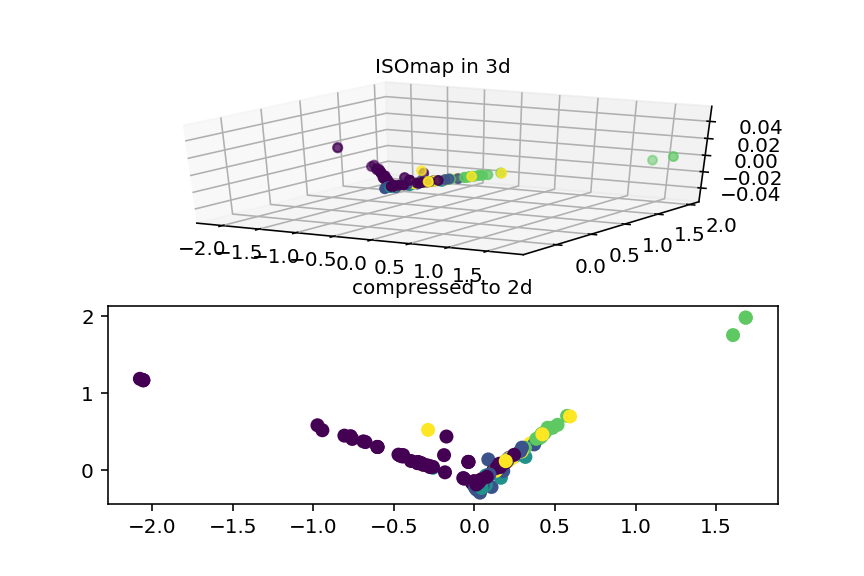

In [33]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('ISOmap in 3d', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = y_kmeans)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('compressed to 2d', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = y_kmeans)
plt.show()

### Plot using PCA 

In [34]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
#fit_transform fits the data and reduces the dimensionality too. 
principalComponents = pca.fit_transform(X3)

In [35]:
principalComponents.shape

(278, 2)

<IPython.core.display.Javascript object>


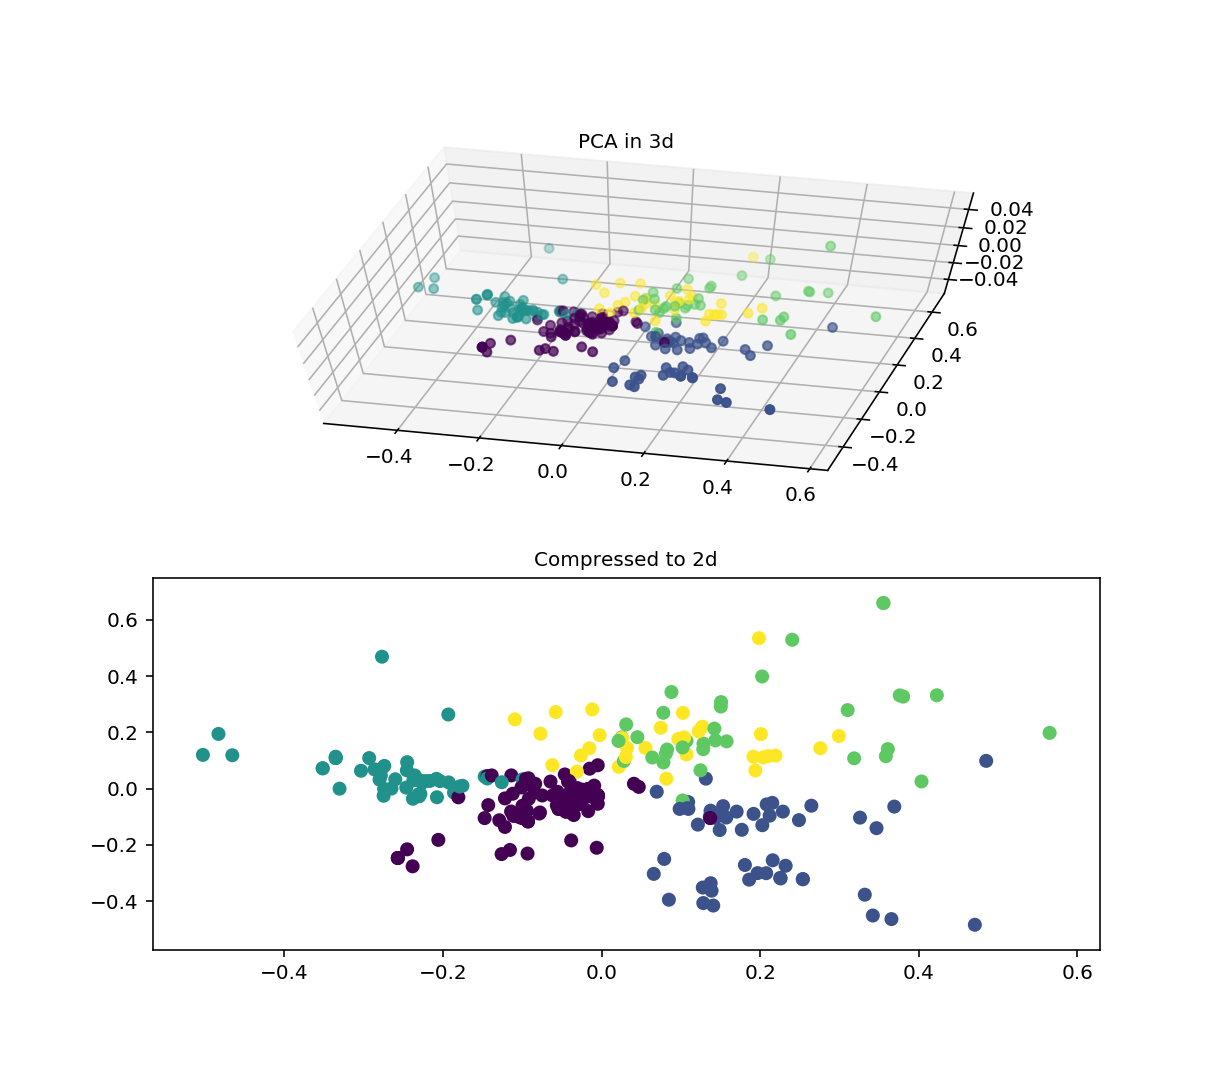

In [40]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('PCA in 3d', fontsize=10)
ax.scatter(principalComponents[:,0],principalComponents[:,1],c = y_kmeans)
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('Compressed to 2d', fontsize=10)
ax.scatter(principalComponents[:,0],principalComponents[:,1],c = y_kmeans)
plt.show()

### Understanding the words which have been clustered

5 Clusters

In [37]:
kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : loan, need, person, busi, repay, rate, appli, want, bank, offer, hous, expens, lowest, k, buy, easi, approv, renov, emi, start, kind, usd, doe, mani, colleg
1 : account, pay, credit, payment, need, want, pleas, card, clear, usd, help, make, know, bank, fund, financi, purchas, send, ac, transact, save, servic, hous, fee, new
2 : money, transfer, account, need, send, fund, c, ac, anoth, wire, want, today, xyz, left, frm, help, asap, usd, time, immedi, appli, month, plz, travel, onlin
3 : balanc, account, statement, view, outstand, generat, bank, open, updat, want, current, need, tell, inquiri, sheet, notifi, mini, app, remain, shift, safe, mobil, net, new, payment


6 clusters

In [38]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : account, money, need, want, send, ac, know, save, bank, clear, xyz, financi, servic, like, help, borrow, fee, new, pay, friend, settl, hi, left, buy, fund
1 : balanc, account, view, statement, outstand, generat, bank, open, updat, current, want, need, tell, inquiri, sheet, notifi, mini, app, remain, shift, safe, mobil, net, new, payment
2 : transfer, money, account, fund, anoth, time, today, ac, help, need, wire, plz, requir, provid, pleas, xyz, kotak, behalf, rs, job, c, urgent, bob, want, support
3 : credit, card, pay, invest, properti, outstand, money, clear, payment, want, month, need, immedi, k, insur, work, review, dollar, avail, appli, statement, arrang, make, pleas, expens
4 : loan, need, person, busi, repay, rate, appli, want, bank, offer, hous, expens, lowest, k, buy, easi, approv, renov, emi, start, kind, usd, doe, mani, colleg
5 : payment, pay, pleas, usd, make, purchas, grant, uber, help, onlin, account, c, charg, send, frm, sum, need, nw, amazon, mobil, transfer, comp

7 clusters

In [39]:
kmeans = KMeans(n_clusters = 7, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 7 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pay, need, payment, want, bank, help, pleas, financi, purchas, clear, transfer, servic, usd, make, ac, hous, new, know, chequ, wire, aid, grant, assist, complet, mortgag
1 : balanc, account, view, outstand, generat, open, updat, current, bank, statement, need, tell, inquiri, sheet, notifi, mini, want, app, remain, shift, safe, mobil, net, new, payment
2 : loan, need, person, busi, repay, rate, appli, want, bank, offer, hous, expens, lowest, k, buy, easi, approv, renov, emi, start, kind, usd, doe, mani, colleg
3 : fund, transfer, transact, plz, borrow, provid, fee, xyz, ac, time, want, school, acoount, germani, india, advanc, wed, admiss, pan, number, wire, asap, anoth, site, shop
4 : credit, card, pay, invest, properti, outstand, money, clear, payment, want, month, need, immedi, k, insur, work, review, dollar, avail, appli, statement, arrang, make, pleas, expens
5 : money, transfer, account, send, need, anoth, left, want, c, help, travel, share, friend, borrow, i'm, asap, pleas, in

## Inference:

The elbow curve tells us that the optimal number of clusters are 5,6 or 7. When we go through the word groupings we understand that the data is talking about the following queries

1.Loan requirement questions 2.Asking the bot to clear bills 3.Outstanding balance check questions 4.Money Transfer queries 5.FAQs

According to the TF-IDF word embedding technique which we just used, these five groups of data are classified in 6 clusters for two reasons. 

1. Since there is a significant amount of noise in the dataset and 

2. Because TF-IDF is essentially a scoring algorithm which creates a score for every word based on their occurences and non occurences. This means the words are measure by relevance and ot frequency


The distribution of these scores, given their weights, creates a slight bias for the noisy data as well. This is vizualized in the various plots as shown above.

Although, the ideal number of cluster remain at 5